In [9]:
import numpy as np
import pandas as pd

In [13]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (3).csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [11]:
dataset=pd.read_csv('diabetes.csv')

In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
len(X_train)

614

In [8]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=29)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=29)

In [ ]:
rf_result=RF.score(X_test,y_test)

In [ ]:
p=100
r1=rf_result*p
print(r1)

80.51948051948052


In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)

In [ ]:
print(cm)

[[95 12]
 [18 29]]


In [ ]:
print(cr)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

0.8051948051948052


In [ ]:
RF_error=np.mean(y_pred!= y_test)
RF_error

0.19480519480519481

In [ ]:
import seaborn as sns

Confusion Matrix:
 [[95 12]
 [18 29]]


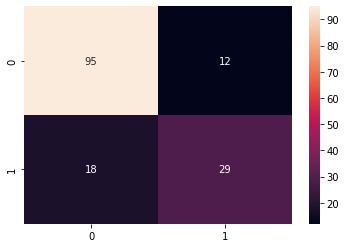

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm2)
sns.heatmap(cm, annot=True)

In [ ]:
accu_err_data={
    'Algorithm':["Randon Forest"],
    'Accuracy':[r1],
    'Error_rate':[RF_error]
}
rf_result_view=pd.DataFrame(accu_err_data)


In [ ]:
rf_result_view

,Algorithm,Accuracy,Error_rate
0,Randon Forest,80.519481,0.194805


In [ ]:

RF.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1])

In [ ]:
RF.predict([[1,85,66,29,0,26.6,23.3,0.672]])

array([0])

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_result=DT.score(X_test,y_test)

In [ ]:
p=100
r2=dt_result*p
print(r2)

77.92207792207793


In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)

In [ ]:
print(cm)

[[89 18]
 [16 31]]


In [ ]:
print(cr)
print(acc)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

0.7792207792207793


In [ ]:
DT_error=np.mean(y_pred!= y_test)
DT_error

0.22077922077922077

Confusion Matrix:
 [[89 18]
 [16 31]]


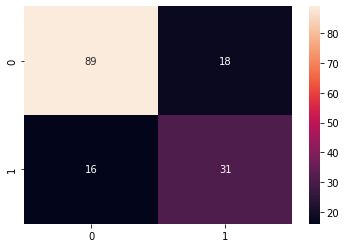

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm2)
sns.heatmap(cm, annot=True)

In [ ]:
accu_err_data={
    'Algorithm':["Randon Forest","Decision Tree"],
    'Accuracy':[r1,r2],
    'Error_rate':[RF_error,DT_error]
}
compare=pd.DataFrame(accu_err_data)

In [ ]:
compare

,Algorithm,Accuracy,Error_rate
0,Randon Forest,80.519481,0.194805
1,Decision Tree,77.922078,0.220779


In [ ]:
DT.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1])

In [ ]:
DT.predict([[1,85,66,29,0,26.6,23.3,0.672]])

array([0])